Part 4 - LoG_Edge: LoG Edge Detector to Image

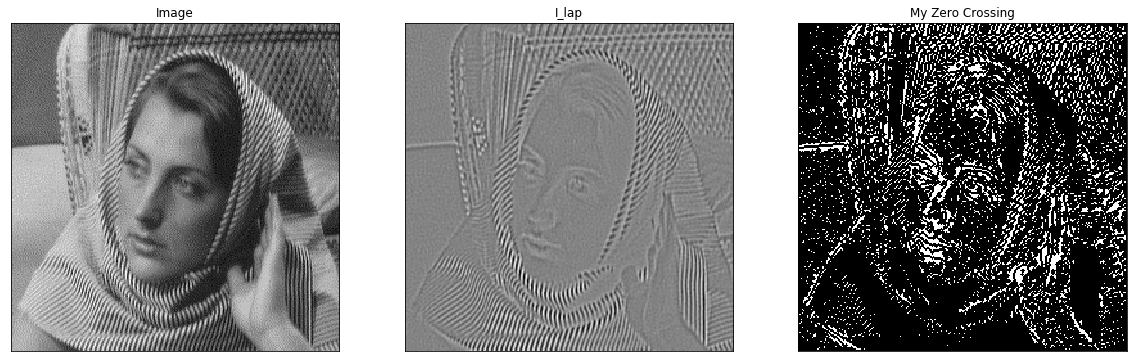

In [100]:
# Apply a 5x5 Laplacian of Gaussian edge detector to the image 'woman'.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image as grayscale
img_path = "./woman.png"
img_woman = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# img_woman = cv2.imread(img_path)


# apply 5x5 Laplacian filter to the intensity channel
I_lap = cv2.Laplacian(img_woman, cv2.CV_64F, ksize=5)
abs_dst = cv2.convertScaleAbs(I_lap)

# Initialize a 2D numpy array of same size as original image to
# store the zero-crossing data
img_zero_crossing = np.zeros((I_lap.shape[0],I_lap.shape[1]))

# Loop through all pixels in the LoG image and check if it is 0,
# or if the neighboring pixels have different sign than the
# current pixel. If it is the case, a zero-crossing point is found
for x in range(1,I_lap.shape[0]-1):
    for y in range(1,I_lap.shape[1]-1):
        if (I_lap[x,y]==0 
           or (np.sign(I_lap[x,y]) != np.sign(I_lap[x-1,y]))
           or (np.sign(I_lap[x,y]) != np.sign(I_lap[x+1,y]))
           or (np.sign(I_lap[x,y]) != np.sign(I_lap[x,y-1]))
           or (np.sign(I_lap[x,y]) != np.sign(I_lap[x,y+1]))):
            img_zero_crossing[x,y] = 0
        else:
            img_zero_crossing[x,y] = 255


# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_woman, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_lap, cmap="gray")
plt.title("I_lap"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_zero_crossing, cmap="gray")
plt.title("My Zero Crossing"), plt.xticks([]), plt.yticks([])

plt.show()
